In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('flights.csv')
df

f:\python-3.6\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Subsetting only 100000 rows for analysis
df = df[0:100000]
df.shape

(100000, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [5]:
df.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              167
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2298
DEPARTURE_DELAY         2298
TAXI_OUT                2371
WHEELS_OFF              2371
SCHEDULED_TIME             0
ELAPSED_TIME            2613
AIR_TIME                2613
DISTANCE                   0
WHEELS_ON               2440
TAXI_IN                 2440
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97611
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [6]:
df.value_counts('DIVERTED')

DIVERTED
0    99776
1      224
dtype: int64

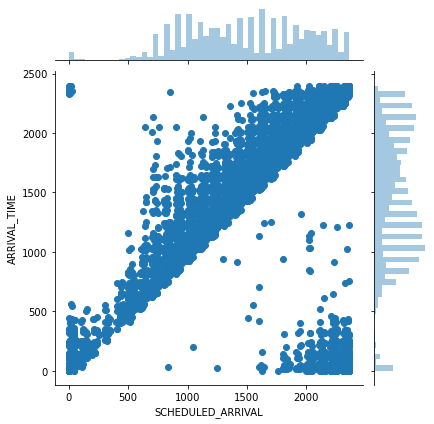

In [7]:
#Jointplot of 'SCHEDULED_ARRIVAL' and 'ARRIVAL_TIME'
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [8]:
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER',
            'TAXI_OUT', 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 
            'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)


In [9]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [10]:
df.shape

(100000, 16)

In [11]:
#Replacing Null values with mean
df=df.fillna(df.mean())

In [12]:
df.isna().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

<AxesSubplot:>

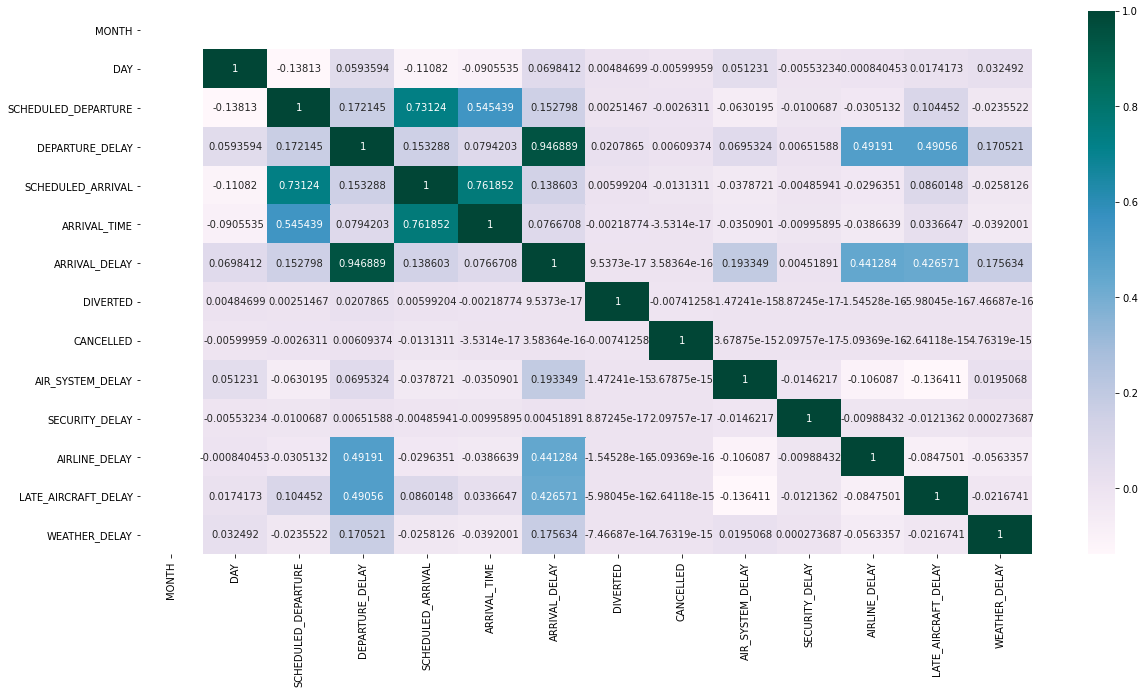

In [15]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="PuBuGn" ,fmt='g')

Here we notice that there are no dependent variable yet which serves as our result wheather flight is delayed or not.
So here I'm creating new feature called 'result' which takes the value 0 and 1. O for the resulting flight is not delayed and 1 for flight delayed.
Here I'm Imputing these values by using the condition if 'ARRIVAL_DELAY' is greater than 15 then imputing 1 else o.

In [23]:
result=[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  
df['result'] = result

In [24]:
df['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

In [17]:
df.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971


<AxesSubplot:xlabel='CANCELLED', ylabel='count'>

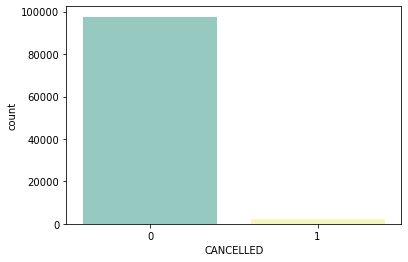

In [21]:
sns.countplot(x='CANCELLED', data=df,palette="Set3") 

<AxesSubplot:xlabel='DIVERTED', ylabel='count'>

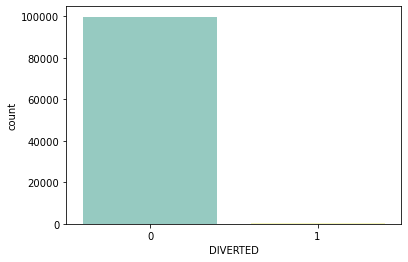

In [22]:
sns.countplot(x='DIVERTED', data=df,palette="Set3") 

<AxesSubplot:xlabel='result', ylabel='count'>

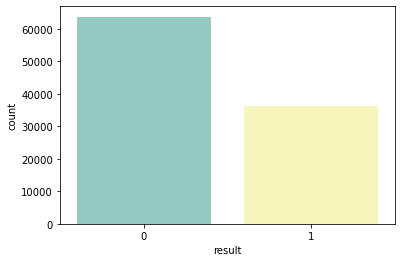

In [25]:
sns.countplot(x='result', data=df,palette="Set3") 

In [26]:
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

Splitting Dataset into Training and Testing with 70:30 ratio and with random_state = 42

In [27]:
df = df.values
X, y = df[:,:-1], df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Feature Scalling

In [28]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [29]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [30]:
pred = clf.predict_proba(X_test)

AUC score of Model

In [31]:
auc_score = roc_auc_score(y_test, pred[:,1])
auc_score

0.9983003977669629

In [32]:
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))

AUC Score of Model is: 99.83 %


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, pred[:,1])
print("Confusion Matrix:")
print(result1)
print('')
result2 = classification_report(y_test, pred[:,1])
print("Classification Report:",)
print (result2)
result3 = accuracy_score(y_test,pred[:,1])
print("Accuracy:",result3)

Confusion Matrix:
[[19119    21]
 [   25 10835]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19140
         1.0       1.00      1.00      1.00     10860

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy: 0.9984666666666666


Text(0.5, 257.44, 'Predicted label')

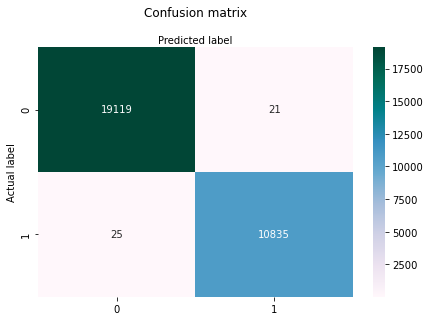

In [34]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True, cmap="PuBuGn" ,fmt='g')## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Receiver Operating Characteristic (ROC) curve of DecisionTreeClassifier

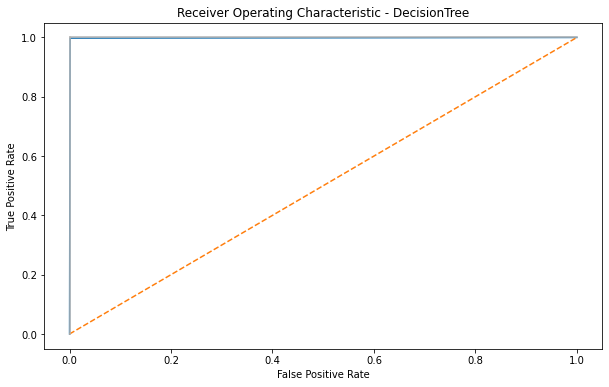

In [36]:
plt.subplots(1, figsize=(10,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [35]:
print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, pred[:,1])*100,2),'%')

Accuracy Achieved: 99.85 %
 
Precision Achieved: 99.81 %
 
Recall Achieved: 99.77 %
